TensorFlow Version: 2.14.0


Copying files: 1944 files [00:06, 312.45 files/s]

Found 1549 images belonging to 15 classes.


Found 395 images belonging to 15 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling

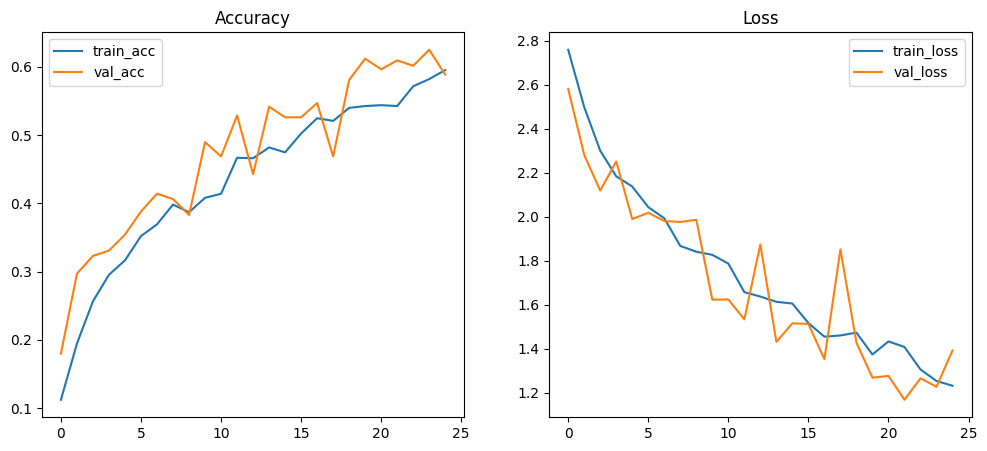

13/13 [==============================] - 9s 631ms/step
Confusion Matrix:
[[4 1 3 4 0 0 3 0 0 0 3 0 1 2 4]
 [3 1 4 2 2 0 0 3 5 1 1 1 1 3 1]
 [1 2 3 2 0 2 1 0 1 2 5 1 0 2 3]
 [2 2 1 1 1 2 0 0 2 1 2 2 3 4 4]
 [2 4 1 3 1 1 2 0 0 1 1 1 1 5 3]
 [0 3 2 1 2 0 1 0 7 1 1 0 1 4 2]
 [2 0 1 1 4 0 2 1 3 1 0 0 4 2 5]
 [3 1 1 2 0 1 3 0 3 1 1 3 1 4 3]
 [2 2 1 1 1 0 3 2 3 1 2 1 0 3 4]
 [1 0 0 3 3 2 2 1 1 2 1 2 3 1 4]
 [2 2 4 4 4 0 2 1 1 0 1 1 1 1 2]
 [1 0 2 7 0 2 3 0 2 1 2 0 2 1 4]
 [2 0 2 0 1 3 3 1 4 2 3 0 4 0 2]
 [3 2 0 2 0 0 1 2 0 6 1 1 1 4 3]
 [4 0 3 5 1 0 0 1 1 2 2 0 6 2 1]]

Classification Report:
              precision    recall  f1-score   support

        Bear       0.12      0.16      0.14        25
        Bird       0.05      0.04      0.04        28
         Cat       0.11      0.12      0.11        25
         Cow       0.03      0.04      0.03        27
        Deer       0.05      0.04      0.04        26
         Dog       0.00      0.00      0.00        25
     Dolphin       0.08     

C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully!


In [8]:
# =============================
# 1. Import Libraries
# =============================
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix
import splitfolders

print("TensorFlow Version:", tf.__version__)

# =============================
# 2. Split Dataset (Train/Val)
# =============================
input_folder = "dataset"  # Original dataset path
output_folder = "data"    # Output folder for train/val

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.2))
train_path = os.path.join(output_folder, "train")
val_path = os.path.join(output_folder, "val")

# =============================
# 3. Data Augmentation
# =============================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

# =============================
# 4. Build CNN Model
# =============================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')  # 15 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# =============================
# 5. Train Model
# =============================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# =============================
# 6. Plot Training History
# =============================
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.show()

# =============================
# 7. Evaluate Model
# =============================
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(val_generator.classes, y_pred))

print("\nClassification Report:")
class_labels = list(train_generator.class_indices.keys())
print(classification_report(val_generator.classes, y_pred, target_names=class_labels))

# =============================
# 8. Save Model
# =============================
model.save("animal_classification_model.h5")
print("Model saved successfully!")

# =============================
# 9. Predict on a New Image
# =============================
def predict_animal(image_path, model, class_labels):
    img = load_img(image_path, target_size=(224,224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    print("Predicted Animal:", class_labels[class_idx])




In [9]:
# Example usage:
predict_animal("download.jpg", model, class_labels)

1/1 [==============================] - 0s 346ms/step
Predicted Animal: Giraffe
